In [1]:
from datasets import load_dataset
import numpy as np
import pandas as pd

In [2]:
ds_full = load_dataset('bookcorpus', split='all')
ds_full

Dataset({
    features: ['text'],
    num_rows: 74004228
})

In [3]:
%%time
ds_full = ds_full.map(lambda x: {'n_tokens': len(x['text'].split(' '))})

CPU times: user 632 ms, sys: 1.74 s, total: 2.37 s
Wall time: 6.28 s


In [6]:
%%time
n_tokens = 0
for sample in ds_full:
    n_tokens += sample['n_tokens']
n_tokens

KeyboardInterrupt: 

In [11]:
%%time

# counting how many samples are longer than the context length, without multiprocessing
ds_full.filter(lambda x: x['n_tokens'] > 1024)

CPU times: user 3.65 ms, sys: 999 μs, total: 4.65 ms
Wall time: 3.96 ms


Dataset({
    features: ['text', 'n_tokens'],
    num_rows: 50
})

In [10]:
%%time

# counting how many samples are longer than the context length, with multiprocessing
ds_full.filter(lambda x: x['n_tokens'] > 1024, num_proc=12)

Filter (num_proc=12):   0%|          | 0/74004228 [00:00<?, ? examples/s]

CPU times: user 524 ms, sys: 124 ms, total: 648 ms
Wall time: 14.5 s


Dataset({
    features: ['text', 'n_tokens'],
    num_rows: 50
})

In [9]:
ds_full.filter(lambda x: x['n_tokens'] == 1)

Dataset({
    features: ['text', 'n_tokens'],
    num_rows: 71598
})

In [16]:
# random samples


idx = np.random.choice(np.arange(len(ds_full)), size=(1_000_000,))
samples = ds_full.select(idx)

In [18]:
x = samples['n_tokens']

(-20.0, 150.0)

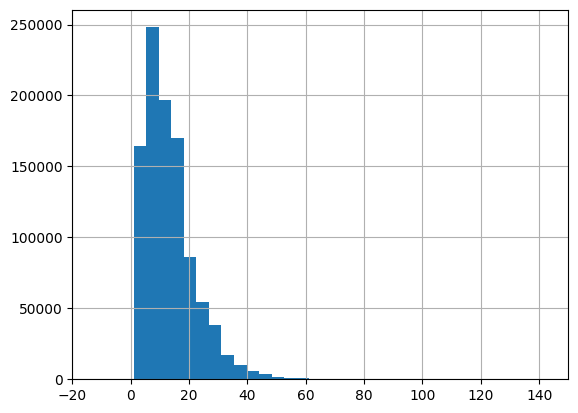

In [22]:
ax = pd.Series(x).hist(bins=150)
ax.set_xlim(-20, 150)

In [17]:
from transformers import AutoTokenizer, PreTrainedTokenizerFast

In [18]:
# from the last week
pt_tokenizer = PreTrainedTokenizerFast(tokenizer_file='hopper.json',
                                      unk_token='[UNK]',
                                      pad_token='[PAD]',
                                      model_input_names=["input_ids","token_type_ids","attention_mask"],
                                      )

/home/jaidevd/conda/envs/dlp/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [21]:
pt_tokenizer.save_pretrained('hopper')

('hopper/tokenizer_config.json',
 'hopper/special_tokens_map.json',
 'hopper/tokenizer.json')

In [22]:
tokenizer = AutoTokenizer.from_pretrained('hopper')

In [23]:
tokenizer

PreTrainedTokenizerFast(name_or_path='hopper', vocab_size=32000, model_max_length=1000000000000000019884624838656, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'pad_token': '[PAD]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	1: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [27]:
from pprint import pprint
enc = tokenizer(ds_full[:4]['text'], padding=True)
pprint(enc['input_ids'], compact=True)

[[2462, 19, 149, 277, 162, 6456, 422, 131, 1559, 536, 19, 2301, 201, 177, 9774,
  21, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0],
 [212, 297, 289, 456, 208, 46, 20830, 1420, 214, 4099, 1171, 139, 11126, 21, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0],
 [178, 206, 337, 7656, 14, 64, 1147, 303, 174, 503, 214, 2363, 2310, 21, 0, 0,
  0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
  0],
 [149, 14, 49, 946, 131, 3760, 880, 375, 3446, 19, 3766, 149, 166, 46, 545,
  1185, 200, 131, 61, 99, 17794, 19, 212, 201, 2596, 9302, 19, 1050, 201, 163,
  3186, 19, 5696, 166, 2270, 5194, 138, 717, 178, 278, 2596, 21]]


In [28]:
# gpt2 tokenizer
tokenizer = AutoTokenizer.from_pretrained('gpt2')
tokenizer

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

/home/jaidevd/conda/envs/dlp/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


GPT2TokenizerFast(name_or_path='gpt2', vocab_size=50257, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<|endoftext|>', 'eos_token': '<|endoftext|>', 'unk_token': '<|endoftext|>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	50256: AddedToken("<|endoftext|>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
}

In [30]:
tokenizer.pad_token = '<|endoftext|>'

In [116]:
ds_full

Dataset({
    features: ['text', 'n_tokens'],
    num_rows: 74004228
})

In [126]:
# tokenize as usual

def get_n_tokens(sample):
    enc = tokenizer(sample['text'])
    return {'n_tokens': [len(e) for e in enc['input_ids']]}

ds = ds_full.filter(lambda x: x['n_tokens'] <= 1024).map(get_n_tokens, num_proc=12, batched=True, batch_size=1024)

Filter:   0%|          | 0/74004228 [00:00<?, ? examples/s]

Map (num_proc=12):   0%|          | 0/74004178 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (1030 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1036 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1030 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1143 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence length for this model (1095 > 1024). Running this sequence through the model will result in indexing errors
Token indices sequence length is longer than the specified maximum sequence leng

In [128]:
T = sum(ds['n_tokens'])
tokens_per_sample = T / len(ds)
tokens_per_sample

14.6456043333121

In [129]:
n_samples_per_1024 = 1024 / tokens_per_sample
n_samples_per_1024

69.91858968024043

In [130]:
n_concat = 70

In [171]:
def chunk(batch):
    text = ' '.join(batch['text'])
    enc = tokenizer(text, padding='max_length', truncation=True)
    return {'text': text, 'n_tokens': len(enc['input_ids']), **enc}
    
ds_chunked = ds_full.filter(lambda x: x['n_tokens'] <= 1024, num_proc=12).batch(n_concat, num_proc=12).map(chunk, num_proc=12)
ds_chunked

Filter (num_proc=12):   0%|          | 0/74004228 [00:00<?, ? examples/s]

Batching examples (num_proc=12):   0%|          | 0/74004178 [00:00<?, ? examples/s]

Map (num_proc=12):   0%|          | 0/1057212 [00:00<?, ? examples/s]

Dataset({
    features: ['text', 'n_tokens', 'input_ids', 'attention_mask'],
    num_rows: 1057212
})

In [170]:
[len(e) for e in ds_chunked['attention_mask']]

[1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]

In [161]:
len(xx['input_ids'])

1013

1024